In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

%matplotlib inline

# Introduction to Peylin flux data

Open flux data files and try some analyis.

In [2]:
file_dir = './../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc'
Rayner = xr.open_dataset(file_dir)

In [3]:
Rayner

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 252)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1992-01-16 00:00:00 ... 2012-12-16 00:00:00
Data variables:
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    ocean             (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Fri Apr  5 01:24:44 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [4]:
time = Rayner.time
str(time.values[0])[:10]

'1992-01-16'

In [150]:
a=xr.DataArray(Rayner.Terrestrial_flux)
pd.DataFrame(a[0].values).iloc[range(67),:].sum().sum()

4387.6265

In [5]:
RT = Rayner.Terrestrial_flux.sel(time=str(time.values[0])[:10]).values[0]
RO = Rayner.ocean.sel(time='1992-06-16').values[0]

In [6]:
RT

array([[0.03179488, 0.03179488, 0.03179488, ..., 0.03179488, 0.03179488,
        0.03179488],
       [0.03179475, 0.03179475, 0.03179475, ..., 0.03179475, 0.03179475,
        0.03179475],
       [0.03179472, 0.03179472, 0.03179472, ..., 0.03179472, 0.03179472,
        0.03179472],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

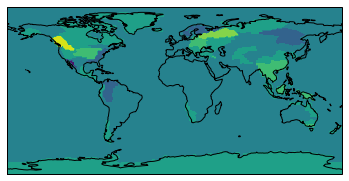

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(Rayner.longitude, Rayner.latitude, RT)

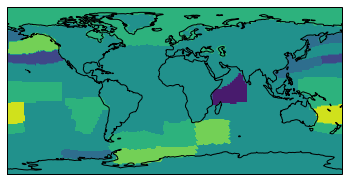

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(Rayner.longitude, Rayner.latitude, RO)

In [2]:
file_dir = './../data/fco2_CAMS-V17-1-2018_June2018-ext3_1979-2017_monthlymean_XYT.nc'
CAMS_V17 = xr.open_dataset(file_dir)

In [10]:
CAMS_V17

<xarray.Dataset>
Dimensions:           (latitude: 180, longitude: 360, time: 468)
Coordinates:
  * longitude         (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * latitude          (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * time              (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Data variables:
    fossil            (time, latitude, longitude) float32 ...
    Terrestrial_flux  (time, latitude, longitude) float32 ...
    Ocean_flux        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.0
    history:      Thu Apr  4 23:44:41 2019: ncrename -a .FillValue,_FillValue...
    NCO:          "4.6.3"

In [11]:
CAMS_V17.Terrestrial_flux

<xarray.DataArray 'Terrestrial_flux' (time: 468, latitude: 180, longitude: 360)>
[30326400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 1979-01-16 00:00:00 ... 2017-12-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

In [12]:
CAMS_V17.Terrestrial_flux.sel(time='2017-11-16')

<xarray.DataArray 'Terrestrial_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[6.597166e-09, 6.602390e-09, ..., 6.933514e-09, 6.597166e-09],
        [4.039088e-08, 4.044185e-08, ..., 4.367262e-08, 4.039088e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-11-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

In [13]:
land = CAMS_V17.Terrestrial_flux.sel(time='2017-12-16')
land

<xarray.DataArray 'Terrestrial_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[5.332498e-09, 5.336406e-09, ..., 5.449448e-09, 5.332498e-09],
        [2.431741e-08, 2.435555e-08, ..., 2.545849e-08, 2.431741e-08],
        ...,
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-12-16 00:00:00
Attributes:
    title:    Terrestrial_flux
    units:    gC/m2/year

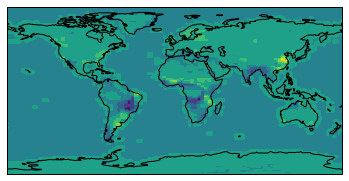

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(land.longitude, land.latitude, land.values[0])

In [15]:
ocean = CAMS_V17.Ocean_flux.sel(time='2017-11-16')
ocean

<xarray.DataArray 'Ocean_flux' (time: 1, latitude: 180, longitude: 360)>
array([[[ 0.      ,  0.      , ...,  0.      ,  0.      ],
        [ 0.      ,  0.      , ...,  0.      ,  0.      ],
        ...,
        [-0.049694, -0.049657, ..., -0.049679, -0.049694],
        [-0.051127, -0.051123, ..., -0.051125, -0.051127]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2017-11-16 00:00:00
Attributes:
    title:    Ocean_flux
    units:    gC/m2/year

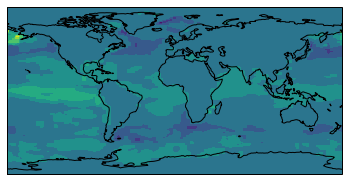

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(ocean.longitude, ocean.latitude, ocean.values[0])

In [17]:
fossil = CAMS_V17.fossil.sel(time='2015-01-16', method='nearest')
fossil

<xarray.DataArray 'fossil' (time: 1, latitude: 180, longitude: 360)>
array([[[0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.],
        ...,
        [0., 0., ..., 0., 0.],
        [0., 0., ..., 0., 0.]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time       (time) object 2015-01-16 00:00:00
Attributes:
    title:    fossil
    units:    gC/m2/year

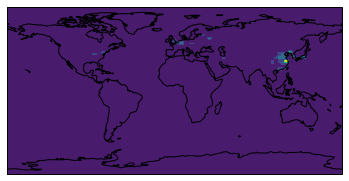

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())
ax.coastlines()
ax.contourf(fossil.longitude, fossil.latitude, fossil.values[0])

# Introduction to integration of gridbox flux with their areas

In [19]:
CAMS_V17.latitude

<xarray.DataArray 'latitude' (latitude: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,   9.5,
        10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,  18.5,  19.5,
        20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,  27.5,  28.5,  29.5,
        30.5,  31.5,  32.5,  3

In [20]:
CAMS_V17.longitude

<xarray.DataArray 'longitude' (longitude: 360)>
array([-179.5, -178.5, -177.5, ...,  177.5,  178.5,  179.5])
Coordinates:
  * longitude  (longitude) float64 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

Function to find the area of one gridbox in metres squared.

In [4]:
import sys

In [5]:
sys.path.append('./../')
from Scripts import flux_area_integration as ea

Example: Area between 20-21N and 20-21W.

In [23]:
ea.scalar_earth_area(20,21,20,21)

11581159925.416557

Example: Area between 0-1N and 0-1W.

In [24]:
ea.scalar_earth_area(0,1,0,1)/1000000

12363.683990261115

In [25]:
ea.scalar_earth_area(89,90,0,1)/1000000

107.89623558970828

Now we can get an array of gridbox areas with the function below.

In [26]:
grid = np.zeros((180,360))
for i in enumerate(range(-90,90)):
    grid[i[0],:] = ea.earth_area(i[1],i[1]+1,range(-180,180),range(-179,181))[0]

In [27]:
grid

array([[1.07896236e+08, 1.07896236e+08, 1.07896236e+08, ...,
        1.07896236e+08, 1.07896236e+08, 1.07896236e+08],
       [3.23655841e+08, 3.23655841e+08, 3.23655841e+08, ...,
        3.23655841e+08, 3.23655841e+08, 3.23655841e+08],
       [5.39316857e+08, 5.39316857e+08, 5.39316857e+08, ...,
        5.39316857e+08, 5.39316857e+08, 5.39316857e+08],
       ...,
       [5.39316857e+08, 5.39316857e+08, 5.39316857e+08, ...,
        5.39316857e+08, 5.39316857e+08, 5.39316857e+08],
       [3.23655841e+08, 3.23655841e+08, 3.23655841e+08, ...,
        3.23655841e+08, 3.23655841e+08, 3.23655841e+08],
       [1.07896236e+08, 1.07896236e+08, 1.07896236e+08, ...,
        1.07896236e+08, 1.07896236e+08, 1.07896236e+08]])

Now multiply the fluxes by the area in each gridbox and sum it up to get the net global sink (at one time point).

In [28]:
land_flux = CAMS_V17.Terrestrial_flux.sel(time='2017-12-16').values[0]
land_flux

array([[5.3324976e-09, 5.3364064e-09, 5.3637663e-09, ..., 6.2680985e-09,
        5.4494480e-09, 5.3324976e-09],
       [2.4317412e-08, 2.4355552e-08, 2.4622503e-08, ..., 3.3446028e-08,
        2.5458490e-08, 2.4317412e-08],
       [3.0211840e-08, 3.0259617e-08, 3.0594048e-08, ..., 3.7863785e-08,
        3.1168334e-08, 3.0211840e-08],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [29]:
total_sink = land_flux*grid
total_sink

array([[ 0.57535641,  0.57577817,  0.57873019, ...,  0.67630423,
         0.58797493,  0.57535641],
       [ 7.87047245,  7.88281673,  7.96921695, ..., 10.82500236,
         8.23978912,  7.87047245],
       [16.29375466, 16.31952155, 16.4998859 , ..., 20.42057751,
        16.80960776, 16.29375466],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Net global terrestrial sink Dec 2017, gC of Carbon (per year or in just that month?)

In [30]:
np.sum(total_sink)

5300820115999727.0

Net global terrestrial sink Dec 2017, gtC of Carbon (per year or in just that month?)

In [31]:
np.sum(total_sink)*1e-15

5.300820115999727

## Semihemispheres and their fluxes

In [32]:
lat = CAMS_V17.latitude
lon = CAMS_V17.longitude

In [33]:
trop = land_flux[(lat>-23) & (lat<23)]

In [34]:
south = land_flux[lat<-23]

In [35]:
north = land_flux[lat>23]

In [36]:
trop_grid = ea.earth_area_grid(lat[(lat>-23) & (lat<23)], lon)

In [37]:
south_grid = ea.earth_area_grid(lat[lat<-23], lon)

In [38]:
north_grid = ea.earth_area_grid(lat[lat>23], lon)

In [39]:
a=south*south_grid

In [40]:
b=trop*trop_grid

In [41]:
c=north*north_grid

In [42]:
(np.sum(a)+np.sum(b)+np.sum(c))/1000000000000000

5.300820115999726

In [43]:
t1=np.array([1,2,3])
t2=np.array([5,6,7])

In [44]:
t1*t2

array([ 5, 12, 21])

In [45]:
np.sum(t1*t2)

38

In [46]:
np.sum(t1)*np.sum(t2)

108

In [47]:
list(CAMS_V17.variables)

['longitude', 'latitude', 'time', 'fossil', 'Terrestrial_flux', 'Ocean_flux']

# Introduction to temporal integration of fluxes

## Dataframe with all time points

In [6]:
Rayner.time

<xarray.DataArray 'time' (time: 252)>
array([cftime.Datetime360Day(1992, 1, 16, 0, 0, 0, 0, 6, 16),
       cftime.Datetime360Day(1992, 2, 16, 0, 0, 0, 0, 1, 46),
       cftime.Datetime360Day(1992, 3, 16, 0, 0, 0, 0, 3, 76), ...,
       cftime.Datetime360Day(2012, 10, 16, 0, 0, 0, 0, 0, 286),
       cftime.Datetime360Day(2012, 11, 16, 0, 0, 0, 0, 2, 316),
       cftime.Datetime360Day(2012, 12, 16, 0, 0, 0, 0, 4, 346)], dtype=object)
Coordinates:
  * time     (time) object 1992-01-16 00:00:00 ... 2012-12-16 00:00:00
Attributes:
    standard_name:  time
    title:          time
    axis:           T
    time_origin:    01-JAN-1900

In [7]:
Rayner.Terrestrial_flux.sel(time=Rayner.time[2]).values

array([[0.0217329 , 0.0217329 , 0.0217329 , ..., 0.0217329 , 0.0217329 ,
        0.0217329 ],
       [0.02173281, 0.02173281, 0.02173281, ..., 0.02173281, 0.02173281,
        0.02173281],
       [0.02173279, 0.02173279, 0.02173279, ..., 0.02173279, 0.02173279,
        0.02173279],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [8]:
Rayner.Terrestrial_flux.sel(time='1992-03-16').values[0].shape

(180, 360)

In [9]:
Rayner.time[0]

<xarray.DataArray 'time' ()>
array(cftime.Datetime360Day(1992, 1, 16, 0, 0, 0, 0, 6, 16), dtype=object)
Coordinates:
    time     object 1992-01-16 00:00:00
Attributes:
    standard_name:  time
    title:          time
    axis:           T
    time_origin:    01-JAN-1900

In [10]:
str(Rayner.time[0].values)[:10]

'1992-01-16'

In [11]:
range(Rayner.time.size)

range(0, 252)

In [13]:
df = pd.DataFrame(np.zeros((9,9)))
df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.loc[0,:]=np.array(single_time.loc[0])
df

,0,1,2,3,4,5,6,7,8
0,0.0,-2.430041,0.030854,-2.173373,-0.287521,1.077926,0.943432,-0.149029,0.283523
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
multiple_time = ea.spatial_integration(data='./../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc',
                                    variables=['Terrestrial_flux','ocean'])
multiple_time

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992-01-16,-2.430040749181076,0.030853742069682968,-2.173373032679136,-0.28752145857162215,1.0779260712112515,0.9434319050277724,-0.1490289475418239,0.283523113725303
1,1992-02-16,-4.21392372609338,0.19397075294592847,-1.8094128614344231,-2.598481617604886,0.14984328938093225,0.486221659157999,-0.4425821690174503,0.10620379924038348
2,1992-03-16,-5.3631133643671,-0.059895323184737295,-1.2300433043922447,-4.0731747367901185,0.06615722476186443,1.0177036872580543,-0.750010890929682,-0.20153557156650798
3,1992-04-16,-0.10416574273852143,0.4895969120472256,0.37311191728382964,-0.9668745720695769,0.5365865694068689,0.8805312778657035,-0.5519147271627702,0.2079700187039356
4,1992-05-16,2.108114538950721,0.2885989117542672,1.826762439388068,-0.007246812191613439,0.26531674483544665,0.8768862018378493,-0.12910703794906397,-0.48246241905333864
5,1992-06-16,-2.7432747096580736,-0.3069401747980775,-0.852088984150649,-1.5842455507093482,-1.3597232819626568,-0.12079302360639732,-0.8105328607741998,-0.4283973975820598
6,1992-07-16,-8.208875579844838,0.9384411090088368,-3.665743596592555,-5.48157309226112,-1.07212131388044,-0.28131093062609913,-0.4646004613017915,-0.3262099219525492
7,1992-08-16,-5.022048072220452,1.1635324696511598,-2.936217250000841,-3.24936329187077,-2.3040880924628997,-0.6527925165717063,-0.8708575669128078,-0.7804380089783858
8,1992-09-16,-2.616833020040259,1.1500861536525433,0.1352580939951556,-3.9021772676879576,-0.797999566757348,0.18737440239529524,-0.8511423247259208,-0.13423164442672225
9,1992-10-16,0.9410695846999743,0.17159437929598492,0.5632835945422766,0.20619161086171245,-0.3347585119533693,0.6930307847579751,-0.3651746950267282,-0.6626146016846161


In [7]:
multiple_time.loc[0,'earth_land_total']

'-0.12861411949692408'

In [8]:
ea.single_time_output(multiple_time, 0, data_path='./../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc')

In [84]:
import importlib as ilib
ilib.reload(ea)

<module 'Scripts.flux_area_integration' from './../Scripts/flux_area_integration.py'>

## Integrating in time from dataframe

In [6]:
Rayner_df = ea.spatial_integration(data='./../data/fco2_Rayner-C13-2018_June2018-ext3_1992-2012_monthlymean_XYT.nc',
                                    variables=['Terrestrial_flux','ocean'])
Rayner_df

,time,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992-01-16 00:00:00,-2.43004,0.0308537,-2.17337,-0.287521,1.07793,0.943432,-0.149029,0.283523
1,1992-02-16 00:00:00,-4.21392,0.193971,-1.80941,-2.59848,0.149843,0.486222,-0.442582,0.106204
2,1992-03-16 00:00:00,-5.36311,-0.0598953,-1.23004,-4.07317,0.0661572,1.0177,-0.750011,-0.201536
3,1992-04-16 00:00:00,-0.104166,0.489597,0.373112,-0.966875,0.536587,0.880531,-0.551915,0.20797
4,1992-05-16 00:00:00,2.10811,0.288599,1.82676,-0.00724681,0.265317,0.876886,-0.129107,-0.482462
5,1992-06-16 00:00:00,-2.74327,-0.30694,-0.852089,-1.58425,-1.35972,-0.120793,-0.810533,-0.428397
6,1992-07-16 00:00:00,-8.20888,0.938441,-3.66574,-5.48157,-1.07212,-0.281311,-0.4646,-0.32621
7,1992-08-16 00:00:00,-5.02205,1.16353,-2.93622,-3.24936,-2.30409,-0.652793,-0.870858,-0.780438
8,1992-09-16 00:00:00,-2.61683,1.15009,0.135258,-3.90218,-0.798,0.187374,-0.851142,-0.134232
9,1992-10-16 00:00:00,0.94107,0.171594,0.563284,0.206192,-0.334759,0.693031,-0.365175,-0.662615


In [7]:
Rayner_df['time'][0][:4]

TypeError: 'cftime._cftime.Datetime360Day' object is not subscriptable

In [8]:
Rayner_df['time'][0][5:7]

TypeError: 'cftime._cftime.Datetime360Day' object is not subscriptable

### Year

In [9]:
index = []
for (i,time) in enumerate(Rayner_df['time']):
    if time.year == 1992:
        index.append(i)
index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [10]:
Rayner_df.iloc[index,1:].sum()

earth_land_total    -29.447621
south_land_total      2.690715
trop_land_total      -9.738235
north_land_total    -22.400101
earth_ocean_total    -3.002181
south_ocean_total     6.117249
trop_ocean_total     -5.815365
north_ocean_total    -3.304065
dtype: float64

In [11]:
min_year = Rayner_df.time[0].year
max_year = Rayner_df.time[Rayner_df.time.size-1].year

Rayner_year = pd.DataFrame(columns=
                                ['Year',
                                 'earth_land_total',
                                 'south_land_total',
                                 'trop_land_total',
                                 'north_land_total',
                                 'earth_ocean_total',
                                 'south_ocean_total',
                                 'trop_ocean_total',
                                 'north_ocean_total']
                               )

for (j,year) in enumerate(range(min_year, max_year+1)):
    index = []
    for (i,time) in enumerate(Rayner_df['time']):
        if time.year == year:
            index.append(i)
    Rayner_year.loc[j,:] = Rayner_df.iloc[index,1:].sum()

Rayner_year['Year'] = range(min_year, max_year+1)
Rayner_year

,Year,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992,-29.4476,2.69072,-9.73824,-22.4001,-3.00218,6.11725,-5.81536,-3.30407
1,1993,-40.4063,-4.46368,-4.55531,-31.3873,14.9359,12.9816,-0.143693,2.09792
2,1994,-9.234,3.47649,6.69389,-19.4044,1.43749,6.95225,-5.638,0.123243
3,1995,-10.1931,-2.91971,15.0366,-22.31,2.70502,9.56498,-5.57833,-1.28163
4,1996,-27.9445,-2.86996,-4.60911,-20.4655,4.72992,8.96086,-4.0432,-0.18774
5,1997,-6.69302,4.73365,13.7156,-25.1423,-5.64755,2.63312,-7.46955,-0.811115
6,1998,11.9143,8.19285,27.1144,-23.3929,-5.11714,2.20758,-7.57744,0.252723
7,1999,-25.7038,0.678663,2.41303,-28.7955,1.68701,5.99328,-5.19122,0.884945
8,2000,-25.885,-4.73236,3.39231,-24.545,3.57465,6.58475,-3.51686,0.50676
9,2001,-24.9975,-2.46616,3.3089,-25.8402,2.41762,8.3095,-5.66343,-0.228448


In [16]:
ea.year_integration(Rayner_df)

,Year,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1992,-29.4476,2.69072,-9.73824,-22.4001,-3.00218,6.11725,-5.81536,-3.30407
1,1993,-40.4063,-4.46368,-4.55531,-31.3873,14.9359,12.9816,-0.143693,2.09792
2,1994,-9.234,3.47649,6.69389,-19.4044,1.43749,6.95225,-5.638,0.123243
3,1995,-10.1931,-2.91971,15.0366,-22.31,2.70502,9.56498,-5.57833,-1.28163
4,1996,-27.9445,-2.86996,-4.60911,-20.4655,4.72992,8.96086,-4.0432,-0.18774
5,1997,-6.69302,4.73365,13.7156,-25.1423,-5.64755,2.63312,-7.46955,-0.811115
6,1998,11.9143,8.19285,27.1144,-23.3929,-5.11714,2.20758,-7.57744,0.252723
7,1999,-25.7038,0.678663,2.41303,-28.7955,1.68701,5.99328,-5.19122,0.884945
8,2000,-25.885,-4.73236,3.39231,-24.545,3.57465,6.58475,-3.51686,0.50676
9,2001,-24.9975,-2.46616,3.3089,-25.8402,2.41762,8.3095,-5.66343,-0.228448


In [20]:
(Rayner_year==ea.year_integration(Rayner_df)).all()

Year                 True
earth_land_total     True
south_land_total     True
trop_land_total      True
north_land_total     True
earth_ocean_total    True
south_ocean_total    True
trop_ocean_total     True
north_ocean_total    True
dtype: bool

### Decadal

In [12]:
index = []
for (i,time) in enumerate(Rayner_df['time']):
    if time.year in range(1990, 2000):
        index.append(i)

In [13]:
Rayner_df.iloc[index,1:].sum()

earth_land_total    -137.708055
south_land_total       9.519020
trop_land_total       46.070837
north_land_total    -193.297912
earth_ocean_total     11.728425
south_ocean_total     55.410943
trop_ocean_total     -41.456796
north_ocean_total     -2.225722
dtype: float64

In [14]:
min_decade = int(Rayner_df.time[0].year/10)*10
max_decade = int(Rayner_df.time[Rayner_df.time.size-1].year/10)*10

Rayner_decade = pd.DataFrame(columns=
                                ['Decade',
                                 'earth_land_total',
                                 'south_land_total',
                                 'trop_land_total',
                                 'north_land_total',
                                 'earth_ocean_total',
                                 'south_ocean_total',
                                 'trop_ocean_total',
                                 'north_ocean_total']
                               )

for (j,decade) in enumerate(range(min_decade, max_decade+10,10)):
    index = []
    for (i,time) in enumerate(Rayner_df['time']):
        if time.year in range(decade, decade+10):
            index.append(i)
    Rayner_decade.loc[j,:] = Rayner_df.iloc[index,1:].sum()

Rayner_decade['Decade'] = range(min_decade, max_decade+10,10)
Rayner_decade

,Decade,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1990,-137.708,9.51902,46.0708,-193.298,11.7284,55.4109,-41.4568,-2.22572
1,2000,-247.845,-15.5226,52.1971,-284.52,-2.74848,71.3748,-52.2913,-21.8319
2,2010,-114.824,-10.7725,3.33853,-107.39,1.21282,16.4627,-12.6477,-2.60223


In [21]:
ea.decade_integration(Rayner_df)

,Decade,earth_land_total,south_land_total,trop_land_total,north_land_total,earth_ocean_total,south_ocean_total,trop_ocean_total,north_ocean_total
0,1990,-137.708,9.51902,46.0708,-193.298,11.7284,55.4109,-41.4568,-2.22572
1,2000,-247.845,-15.5226,52.1971,-284.52,-2.74848,71.3748,-52.2913,-21.8319
2,2010,-114.824,-10.7725,3.33853,-107.39,1.21282,16.4627,-12.6477,-2.60223


In [22]:
(Rayner_decade==ea.decade_integration(Rayner_df)).all()

Decade               True
earth_land_total     True
south_land_total     True
trop_land_total      True
north_land_total     True
earth_ocean_total    True
south_ocean_total    True
trop_ocean_total     True
north_ocean_total    True
dtype: bool

### Whole

In [25]:
Rayner_whole = Rayner_df.iloc[:,1:].sum()
Rayner_whole

earth_land_total    -500.376996
south_land_total     -16.776086
trop_land_total      101.606510
north_land_total    -585.207420
earth_ocean_total     10.192766
south_ocean_total    143.248454
trop_ocean_total    -106.395823
north_ocean_total    -26.659865
dtype: float64

In [26]:
ea.whole_time_integration(Rayner_df)

earth_land_total    -500.376996
south_land_total     -16.776086
trop_land_total      101.606510
north_land_total    -585.207420
earth_ocean_total     10.192766
south_ocean_total    143.248454
trop_ocean_total    -106.395823
north_ocean_total    -26.659865
dtype: float64

In [27]:
(Rayner_whole==ea.whole_time_integration(Rayner_df)).all()

True